# 01 — X–θ Cross-Hall Drift (Baseline)

Generates a minimal baseline curve using the schematic scaling $\Delta y \propto (\partial_y A_\theta)\,\dot\theta\,T^2$.

Exports `paper2/data/cross_hall_drift_baseline.csv`.


In [1]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- repo setup ----
repo_root = Path.cwd().resolve()
for _ in range(10):
    if (repo_root / 'src').exists() and (repo_root / 'paper2').exists():
        break
    repo_root = repo_root.parent

src_path = str(repo_root / 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

out_csv = repo_root / 'paper2' / 'data' / 'cross_hall_drift_baseline.csv'
out_csv.parent.mkdir(parents=True, exist_ok=True)
print('Output CSV:', out_csv)

Output CSV: C:\workspace\Physics\X-theta-framework\paper2\data\cross_hall_drift_baseline.csv


In [2]:
# Baseline parameters (demo units)
kappa = 1.0
dA_dy = 0.75      # gradient ∂_y A_θ
theta_dot = 2.0   # dial rate
alpha = 0.5       # geometry/window factor

Ts = np.linspace(0.0, 5.0, 51)
delta_y = alpha * kappa * dA_dy * theta_dot * (Ts ** 2)

df = pd.DataFrame({
    'T': Ts,
    'delta_y': delta_y,
    'kappa': kappa,
    'dA_dy': dA_dy,
    'theta_dot': theta_dot,
    'alpha': alpha,
})
df.to_csv(out_csv, index=False)
print('Wrote:', out_csv)
df.head()

Wrote: C:\workspace\Physics\X-theta-framework\paper2\data\cross_hall_drift_baseline.csv


,T,delta_y,kappa,dA_dy,theta_dot,alpha
0,0.0,0.0000,1.0,0.75,2.0,0.5
1,0.1,0.0075,1.0,0.75,2.0,0.5
2,0.2,0.0300,1.0,0.75,2.0,0.5
3,0.3,0.0675,1.0,0.75,2.0,0.5
4,0.4,0.1200,1.0,0.75,2.0,0.5


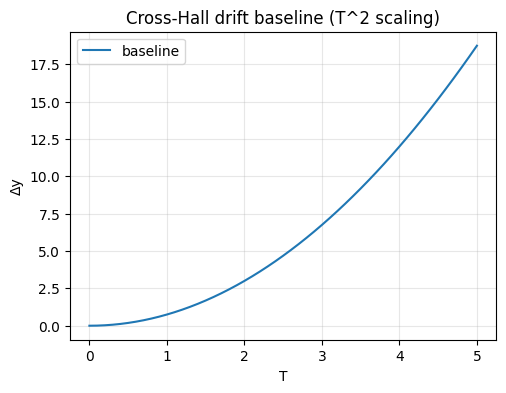

In [3]:
plt.figure(figsize=(5.5, 4))
plt.plot(df['T'], df['delta_y'], label='baseline')
plt.xlabel('T')
plt.ylabel('Δy')
plt.title('Cross-Hall drift baseline (T^2 scaling)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()